In [1]:
from AdventUtils import *

starting import


# Day 1

In [3]:
input = parse(1, int)
def increases(input: Sequence[int]=input):
    counter = 0
    start = input[0]
    for num in input[1:]:
        if(num > start):
            counter += 1
        start = num
    return counter

def increases_improved(input: Sequence[int]=input):
    return quantify(input[i] > input[i-1] for i in range(1, len(input)))

answer(1.1, 1482, lambda: increases_improved(input))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 2000 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
148
167
168
169
182
188
193
209
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 2000 ints:
────────────────────────────────────────────────────────────────────────────────────────────────────
148
167
168
169
182
188
193
209
...


  .0000 seconds, answer: 1,400 !!!! INCORRECT !!!! Expected 1,482

In [4]:
def increases2(input: str = input):
    
    prev = sum(input[0:3])
    counter = 0
    for i in range(1, len(input)-2):
        cur = sum(input[i:i+3])
        if(cur > prev):
            counter += 1
        prev = cur
    return counter
    
def q(iterable, pred=bool):
    return sum(1 for item in iterable if pred(item))

def increases2_improved(input):
    return q(sum(input[i:i+3]) < sum(input[i+1:i+4]) for i in range(0,len(input)-3))
    
def windows(sequence, width):
    return [sum(sequence[i:i+width]) for i in range(0, len(sequence)-width+1)]

answer(1.2, 1518, lambda: increases_improved(windows(input,3)))


  .0010 seconds, answer: 1,429 !!!! INCORRECT !!!! Expected 1,518

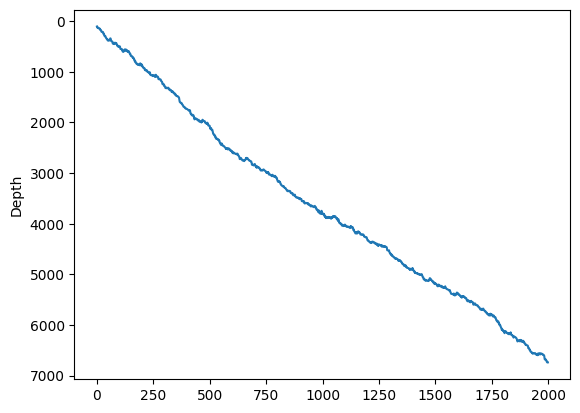

In [5]:
plt.plot(input)
plt.ylabel('Depth')
plt.gca().invert_yaxis()

# Day 2

In [322]:
input2 = parse(2, atoms)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1000 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
forward 4
down 9
forward 6
down 5
up 2
forward 5
forward 7
up 5
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1000 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
('forward', 4)
('down', 9)
('forward', 6)
('down', 5)
('up', 2)
('forward', 5)
('forward', 7)
('up', 5)
...


In [323]:
def getposition(input: Sequence[atoms]):
    x = 0
    y = 0
    for op, val in input:
        if op == 'forward': x += val
        elif op == 'down': y += val
        elif op == 'up': y -= val
            
    print(f"{x}, {y}")
    print(x * y)
    return(x * y)

answer(2.1, 1727835, lambda: getposition(input2))

1905, 907
1727835


  .0013 seconds, answer: 1,727,835

In [324]:
def getposition2(input: Sequence[atoms]):
    x = y = aim = 0
    for op, val in input:
        if op == 'forward': 
            x += val
            y += aim * val
        elif op == 'down': aim += val
        elif op == 'up': aim -= val
            
    print(f"{x}, {y}")
    print(x * y)
    return(x * y)

answer(2.2, 1544000595, lambda: getposition2(input2))


1905, 810499
1544000595


  .0012 seconds, answer: 1,544,000,595

# Day 3

In [325]:
in3 = parse(3, str)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1000 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
110001010110
011101111101
111011110101
011110101000
100100011001
011001001110
101011000101
110000111111
...


In [326]:
import math
def arr_to_dec(bin_arr):
    total = 0
    for i, d in enumerate(bin_arr[::-1]):
        total += int(math.pow(2,i)) * d
    return total
          
def power(input: Sequence[str]):

    result = [0] * (len(input[0]))
    for bin in input:
        for i, c in enumerate(bin):
            result[i] += int(c)
            
    gamma_bin = [int(n > (len(input) / 2)) for n in result]
    epsilon_bin = [int(n < (len(input) / 2)) for n in result]
    gamma = arr_to_dec(gamma_bin)
    epsilon = arr_to_dec(epsilon_bin)
    return gamma * epsilon
    

def power2(input: Sequence[str]):
    def common(diags, i):
        col = [diag[i] for diag in diags]
        return '1' if col.count('1') > col.count('0') else '0'
    def uncommon(diags, i):
        col = [diag[i] for diag in diags]
        return '1' if col.count('1') < col.count('0') else '0'
        
    gamma = epsilon = '' 
    for i, s in enumerate(input[0]):
        gamma += common(input, i)
        epsilon += uncommon(input, i)

    return int(gamma,2) * int(epsilon,2)


print(answer(3.1, 2035764, lambda: power(in3)))
print(answer(3.1, 2035764, lambda: power2(in3)))


  .0056 seconds, answer: 2,035,764
  .0033 seconds, answer: 2,035,764


In [327]:
def life_support(input: Sequence[str]):
    def common(diags, i):
        col = [diag[i] for diag in diags]
        return '1' if col.count('1') >= col.count('0') else '0'

    def uncommon(diags, i):
        col = [diag[i] for diag in diags]
        return '1' if col.count('1') < col.count('0') else '0'
        
    def get_oxygen(diags):
        filterbit = common(diags, 0)
        filtered = [diag for diag in diags if diag[0] == filterbit]
        for i in range(1, len(diags[0])):
            filterbit = common(filtered, i)
            filtered = [diag for diag in filtered if diag[i] == filterbit]
            if len(filtered) == 1: 
                return filtered[0]
        if not filtered:
            raise Exception("")

    def get_co2(diags):
        filterbit = uncommon(diags, 0)
        filtered = [diag for diag in diags if diag[0] == filterbit]
        for i in range(1, len(diags[0])):
            filterbit = uncommon(filtered, i)
            filtered = [diag for diag in filtered if diag[i] == filterbit]
            if len(filtered) == 1: 
                return filtered[0]
        if not filtered:
            raise Exception("")

    oxygen = get_oxygen(input)
    co2 = get_co2(input)
    print(oxygen)
    print(co2)
    return int(oxygen,2) * int(co2,2)


def life_support2(input: Sequence[str]):
    def common(diags, i):
        col = [diag[i] for diag in diags]
        return '1' if col.count('1') >= col.count('0') else '0'

    def uncommon(diags, i):
        col = [diag[i] for diag in diags]
        return '1' if col.count('1') < col.count('0') else '0'
        
    def filter(diags, common_fn, i):
        if len(diags) == 1:
            return diags[0]
        else:
            bit = common_fn(diags, i)
            filtered = [diag for diag in diags if diag[i] == bit]
            return filter(filtered, common_fn, i+1)
            
    return int(filter(input, common, 0), 2) * int(filter(input, uncommon, 0), 2)
    
#answer(3.2, 2817661, lambda: life_support(in3))
answer(3.2, 2817661, lambda: life_support2(in3))

  .0133 seconds, answer: 2,817,661

# Day 4

In [328]:
from itertools import *
from tabulate import tabulate

class Board():
    def __init__(self, grid=()):
        self.winner = False
        self.called = {(x,y): False
                     for y, row in enumerate(grid)
                     for x, val in enumerate(row.split())}

        self.board = {(x,y): val
                     for y, row in enumerate(grid)
                     for x, val in enumerate(row.split())}

        self.lookup = {val: (x,y)
                     for y, row in enumerate(grid)
                     for x, val in enumerate(row.split())}
            
    def get_row(self, number: int):
        point = self.lookup.get(number)
        if not point: return []
        row_points = [(x, point[1]) for x in range(0,5)]
        return [self.called.get(point)for point in row_points]

    def get_column(self, number: int):
        point = self.lookup.get(number)
        if not point: return []
        col_points = [(point[0], y) for y in range(0,5)]
        return [self.called.get(point) for point in col_points]
        
    def is_winner(self, number):
        winner = self.get_column(number).count(True) == 5 or self.get_row(number).count(True) == 5
        if winner:
            self.winner = True
        return winner
        
    def call_number(self, number: int):
        point = self.lookup.get(number)
        if point: 
            self.called[point] = True
            return True
        return False
        
    def calculate_score(self, number):
        # sum all unmarked 
        unmarked = [int(unmarked[1]) for unmarked in self.board.items() if not self.called.get(unmarked[0])]
        unmarked_sum = sum(unmarked)
        # multiply by last number
        return unmarked_sum * int(number)

def parser(text):
    if type(text) is str:
        return text.split(',')
    elif isinstance(text, Iterable):
        groups = batched(text, 6)
        groups = [g for g in groups]
        return [Board(g[:5:]) for g in groups]
    
def sections(text):
    lines = text.splitlines()
    return[lines[0], lines[2::]]

in4 = parse(4, parser, sections, 0)

def bingo(input):
    def print_board(board):
        print(tabulate([[board[n] for n in l] for l in batched(board, 5)]))
        
    for number in input[0]:
        for board in input[1]:
            board.call_number(number)
            if board.is_winner(number): 
                print_board(board.board)
                print_board(board.called)
                return board.calculate_score(number)
    
answer(4.1, 5685 , lambda: bingo(in4))


--  --  --  --  --
14  91  37   5  98
68  29  34  76  43
75   0  67  33  69
81  47  58  30  93
88  92  42  77  54
--  --  --  --  --
-----  -----  -----  ----  -----
True   False  False  True  False
False  True   False  True  False
False  True   False  True  False
False  False  False  True  False
False  False  False  True  False
-----  -----  -----  ----  -----


  .0182 seconds, answer: 5,685

In [329]:

numbers, *boards = parse(4, parser, sections, 0)
boards = boards[0]

def bingo2(numbers, boards):
    def print_board(board):
        print(tabulate([[board[n] for n in l] for l in batched(board, 5)]))
        
    winners = 0 
    for number in numbers:
        for board in boards:
            if not board.winner:
                board.call_number(number)
            if board.is_winner(number): 
                winners += 1
                if winners == len(boards):
                    return board.calculate_score(number)
                    
        

answer(4.1, 21070 , lambda: bingo2(numbers, boards))

  .0356 seconds, answer: 21,070

In [330]:
numbers, *boards = in4 = parse(4, ints, sections = lambda text : text.split('\n\n'), show=0)
size = 5
Line = List[int]

def lines(board: Tuple[int], number) -> Tuple[Line, Line]:
    index = board.index(number)
    row = index // size
    col = index % size
    return [[board[n] for n in range(row*size, row*size+size)], 
            [board[col + (n * size)] for n in range(0, size)]]

def check_winners(boards, drawn, lastnum):
    for board in boards:
        if lastnum in board:
            for line in lines(board, lastnum):
                if all([(num in drawn) for num in line]):
                    print(board)
                    return calculate_score(board, drawn, lastnum)

def calculate_score(board, drawn, lastnum):
        unmarked_sum = sum([num for num in board if num not in drawn])
        return unmarked_sum * lastnum

def bingo(numbers, boards):
    drawn = set()
    for num in numbers:
        drawn.add(num)
        result = check_winners(boards, drawn, num)
        if result: return result

answer(4.1, 5685 , lambda: bingo(numbers, boards))

(14, 91, 37, 5, 98, 68, 29, 34, 76, 43, 75, 0, 67, 33, 69, 81, 47, 58, 30, 93, 88, 92, 42, 77, 54)


  .0057 seconds, answer: 5,685

In [331]:

numbers, *boards = in4 = parse(4, ints, sections = lambda text : text.split('\n\n'), show=0)

size = 5
Line = List[int]

def lines(board: Tuple[int], number) -> Tuple[Line, Line]:
    index = board.index(number)
    row = index // size
    col = index % size
    return [[board[n] for n in range(row*size, row*size+size)], 
            [board[col + (n * size)] for n in range(0, size)]]

def check_winners(boards, drawn, lastnum):
    def line_filled(line, drawn):
        return all([(n in drawn) for n in line])
    return [board for board in boards 
            if lastnum in board and 
            any([line_filled(line, drawn) for line in lines(board, lastnum)])]

def bingo2(numbers, boards):
    drawn = set()
    remaining_boards = set(boards)
    for num in numbers:
        drawn.add(num)
        winners = check_winners(remaining_boards, drawn, num)
        if winners: 
            remaining_boards -= set(winners)
            if not remaining_boards: 
                return calculate_score(winners[-1], drawn, num)

def calculate_score(board, drawn, lastnum):
        unmarked_sum = sum([num for num in board if num not in drawn])
        return unmarked_sum * lastnum

answer(4.2, 21070 , lambda: bingo2(numbers, boards))

  .0176 seconds, answer: 21,070

# Day 5

In [332]:
class Segment(dict):
    def __init__(self, a, b):
        self.a = Point(a[0], a[1])
        self.b = Point(b[0], b[1])

    def __str__(self):
        return f'{self.a}, {self.b}'

class Point(dict):
    def __init__(self, x, y):
        self.x = int(x)
        self.y = int(y)
        
    def __str__(self):
        return f'({self.x}, {self.y})'


def get_segment_points(seg):
    if seg.a.x == seg.b.x:
        x = seg.a.x
        start, end = sorted([seg.a.y, seg.b.y])
        return [(x,y) for y in range(start, end+1)]
    elif seg.a.y == seg.b.y:
        y = seg.a.y
        start, end = sorted([seg.a.x, seg.b.x])
        return [(x,y) for x in range(start, end+1)]


def parser(text) -> Tuple[Tuple[int,int], Tuple[int,int]]:
    a, b  = text.split(' -> ')
    return Segment(a.split(','), b.split(','))


def segments(segments):  
    grid = {}
    twos = 0
    for segment in segments:
        points = get_segment_points(segment)
        if points:
            for point in points:
                if point in grid:
                    if grid[point] == 1:
                        twos += 1
                    grid[point] = grid[point] + 1
                else:
                    grid[point] = 1
    return twos
                
in5 = parse(5, parser=parser, show=0)

answer(5.1, 5608 , lambda: segments(in5))

  .1152 seconds, answer: 5,608

In [333]:
def get_segment_points(seg):
    x1, y1, x2, y2 = seg
    if x1 == x2:
        start, end = sorted([y1, y2])
        return [(x1,y) for y in range(start, end+1)]
    elif y1 == y2:
        start, end = sorted([x1, x2])
        return [(x,y1) for x in range(start, end+1)]
#    elif abs(x2-x1) == abs(y2-y1):
    else: 
        return []

def segments(segments):  
    grid = {}
    twos = 0
    for segment in segments:
        points = get_segment_points(segment)
        for point in points:
            if point in grid:
                if grid[point] == 1:
                    twos += 1
                grid[point] = grid[point] + 1
            else:
                grid[point] = 1
    return twos
                
in5 = parse(5, ints, show=0)

answer(5.1, 5608 , lambda: segments(in5))

  .0856 seconds, answer: 5,608

In [334]:

def get_points(segment):
    x1,y1,x2,y2 = segment
    if x1 == x2:
        return [(x1, y) for y in cover(y1, y2)]
    elif y1 == y2:
        return [(x, y1) for x in cover(x1, x2)]
    else:
         return []
        
def segments2(segments):
    counts = Counter(flatten(map(get_points, in5)))
    return quantify(counts[p] >= 2 for p in counts)

in5 = parse(5, ints, show=0)

answer(5.1, 5608 , lambda: segments2(in5))

  .1643 seconds, answer: 5,608

In [335]:

def get_segment_points(seg):
    x1, y1, x2, y2 = seg
    if x1 == x2:
        start, end = sorted([y1, y2])
        return [(x1,y) for y in range(start, end+1)]
    elif y1 == y2:
        start, end = sorted([x1, x2])
        return [(x,y1) for x in range(start, end+1)]
    elif abs(x2-x1) == abs(y2-y1):
        xsub = -1 if x2<x1 else 1
        ysub = -1 if y2<y1 else 1
        points =  [z for z in zip(range(x1, x2+xsub, xsub), range(y1, y2+ysub, ysub))]
        return points

def segments(segments):  
    grid = {}
    twos = 0
    for segment in segments:
        points = get_segment_points(segment)
        for point in points:
            if point in grid:
                if grid[point] == 1:
                    twos += 1
                grid[point] = grid[point] + 1
            else:
                grid[point] = 1
    return twos
                
in5 = parse(5, ints, show=0)

answer(5.2, 20299 , lambda: segments(in5))

  .3516 seconds, answer: 20,299

# Day 6

In [337]:
in6 = parse(6, int, lambda text: text.split(','), show=0)

def fish(fish):
    fish = int(fish)
    if fish == 0:
        return [6,8]
    else:
        return [(fish-1)]

def execute_day(fishlist):
    return [f for f in flatten([fish(f) for f in fishlist])]

def fish_pop(fishlist, days):
    for day in range(days):
        fishlist = execute_day(fishlist)
    return len(fishlist)

answer(6.1, 350605, lambda: fish_pop(in6, 80))

 5.8449 seconds, answer: 350,605

In [358]:
def fish_pop(fishlist, days):
    pop = Counter(fishlist)
    for day in range(days):
        pop = Counter({t-1: pop[t] for t in pop})
        if -1 in pop:
            pop[6] += pop[-1]
            pop[8] = pop[-1]
            pop[-1] = 0
    return total(pop)

in6 = parse(6, int, lambda text: text.split(','), show=0)
answer(6.2, 1592778185024, lambda: fish_pop(in6, 256))


  .0197 seconds, answer: 1,592,778,185,024

# Day 7

In [7]:
in7 = parse(7, int, lambda text: text.split(','), show=0)

def crabs(positions):
    med = int(median(positions))
    return sum(map(lambda p: abs(p-med), positions))
    
answer(7.1, 352331, lambda: crabs(in7))

  .0006 seconds, answer: 352,331

In [8]:
in7 = parse(7, int, lambda text: text.split(','), show=0)
import numpy as np

def crabs2(positions):
    m = max(positions)
    c = [0] * (m+1)
    cost = {i: gas + sum(range(0, gas)) for i, gas in enumerate(range(0, m+1))}
    for pos in positions:
        prices = [cost[abs(pos - i)] for i in range(0, m+1)]
        c = np.add(c, prices)
    return min(c)

answer(7.2, 99266250, lambda: crabs2(in7))

  .9274 seconds, answer: 99266250

In [9]:
in7 = parse(7, int, lambda text: text.split(','), show=0)
import numpy as np

def crabs2(positions):
    m = max(positions)
    c = [0] * (m+1)
    cost_list = [gas + sum(range(0, gas)) for gas in range(0, m+1)]
    for pos in positions:
        prices = cost_list[1:pos+1][::-1] + [0] + cost_list[1:m-pos+1]
        c = np.add(c, prices)
    return min(c)

answer(7.2, 99266250, lambda: crabs2(in7))

  .3792 seconds, answer: 99266250

# Day 8

In [27]:
in8 = parse(8, lambda line: mapt(atoms, line.split('|')))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 200 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
cbdfag bf ebgda cfead aecbgd dfbea dbafecg fab bgdaef fgeb | bf defbag efadgbc bfgeda
defgac bfcedag fcaeb gefcb acdfe bfad bea ba acbedg cdebfa | abcfed adfb fdba ab
aegbdc cdgbaf gb bacegdf cbeg bdgae dgb dagfe dcfbae cbdae | gcfdba cbeg becg bdg
fdcag feabgc gefab ebcgdf cafbg cb dgfeba baec cgb dacegfb | eacb cb gbc bcg
dbgec gdcae gbcfde dgba cfegba fceda cga becdag ga gacfedb | ag ag cag acg
adfceb edcg fabegd bgfadec dg dag cbgfa fedac cfdage adgfc | gedc agd adg abcgf
egbacdf dbgcf fd efcgdb gafbc dgfe dcf dbegc ebdfac bcdeag | bdgec facgb agfdbec agbcf
ecbda dbcef agecfd fcgdeab gecbda fec cfgbd fe abef daecfb | fe ecf cef abef
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜

In [28]:

def segments(inputs):
    return quantify(len(s) in (2,4,3,7) for (patterns, output) in inputs for s in output)

answer(8.1, 532, lambda: segments(in8))

  .0005 seconds, answer: 532

In [56]:

def segments(inputs):
    total = 0
    for patterns, output in inputs:
        lookup = {}
        
        '''
        2 : 1
        3 : 7
        4 : 4
        5 : 2, 3, 5
        6 : 0, 6, 9
        7 : 8

        3: size 5, contains 7
        5: size 5, contains 4 segment not in 3
        2: not 3, not 5
        
        6: size 6, does not contain char in 1 and 2
        9: size 6, not 6, does not conttain 5
        0: size 6, not 6, not 9
        '''

        fives = []
        sixes = []

        for pattern in patterns:
            if len(pattern) == 2:
                lookup[1] = set(pattern)
            elif len(pattern) == 4:
                lookup[4] = set(pattern)
            elif len(pattern) == 3:
                lookup[7] = set(pattern)
            elif len(pattern) == 7:
                lookup[8] = set(pattern)
            elif len(pattern) == 5:
                fives.append(set(pattern))
            elif len(pattern) == 6:
                sixes.append(set(pattern))

        for five in fives:
            if lookup[7].issubset(five): 
                lookup[3] = five
                fives.remove(five)
        
        for five in fives:
            if (lookup[4] - lookup[3]).issubset(five):
                lookup[5] = five
            else:
                lookup[2] = five
                
        for six in sixes:
            if not lookup[1].intersection(lookup[2]).issubset(six):
                lookup[6] = six
                sixes.remove(six)
                
        for six in sixes:
            if lookup[5].issubset(six):
                lookup[9] = six
            else:
                lookup[0] = six
                
        l = {frozenset(b):str(a) for a, b in lookup.items()}
        result = ''.join([l[frozenset(num)] for num in output])
        total += int(result)
    return total


answer(8.2, 1011284, lambda: segments(in8))

  .0058 seconds, answer: 1,011,284

# Day 9

In [48]:
in9 = parse(9, lambda line: list(map(int, line)), show=0)

def smoke(basin):
    def left(rows, k):
        return 9 if k == 0 else rows[1][k-1]
    def right(rows, k):
        return 9 if k == len(rows[0])-1 else rows[1][k+1]
    def up(rows, k):
        return rows[0][k]
    def down(rows, k):
        return rows[2][k]

    risk = 0
    for i in range(0, len(basin)):
        rows = [basin[j] if j>=0 and j<len(basin) else [10] * len(basin[0]) for j in range(i-1, i+2) ]
        for k, height in enumerate(rows[1]):
            if height < left(rows, k) and height < right(rows, k) and height < up(rows, k) and height < down(rows, k):
                risk += height +1
    return risk

answer(9.1, 500, lambda: smoke(in9))

  .0040 seconds, answer: 500

In [24]:
import math
in9 = parse(9, lambda line: list(map(int, line)), show=0)

def left(rows, k): return 9 if k == 0 else rows[1][k-1]
def right(rows, k): return 9 if k == len(rows[0])-1 else rows[1][k+1]
def up(rows, k): return rows[0][k]
def down(rows, k): return rows[2][k]

def get_lowest_points(basin):
    lows = []
    for i in range(0, len(basin)):
        rows = [basin[j] if j>=0 and j<len(basin) else [10] * len(basin[0]) for j in range(i-1, i+2)]
        for k, height in enumerate(rows[1]):
            if height < left(rows, k) and height < right(rows, k) and height < up(rows, k) and height < down(rows, k):
                lows.append((i,k))
    return lows


def smoke(basin):
    def get(basin, point):
        i, j = point[0], point[1]
        invalid = (i<0 or i>=len(basin[0]) or j<0 or j>= len(basin)) or basin[i][j] in ['9', '.', '*']
        return not invalid

    def surround(p, basin):
        area = 0
        if get(basin, p):
            basin[p[0]][p[1]] = '*' 
            area += 1

        for point in [(p[0]+1, p[1]), (p[0], p[1]+1), (p[0]-1, p[1]), (p[0], p[1]-1)]:
            if get(basin, point):
                basin[point[0]][point[1]] = '.' 
                area += 1 + surround(point, basin)

        return area
        
    points = get_lowest_points(basin)
    basin = [[str(num) for num in row] for row in basin]
    areas = [surround(point,basin) for point in points]

    for row in basin:
        print(''.join([r for r in row]))

    return math.prod(sorted(areas, reverse=True)[0:3])

answer(9.2, 970200,lambda: smoke(in9))

...99..*...9...99*......9.*.99.....9.*9......9..*.....9.*9.9....*9.........99..9............9.......
.....9....9...99.9...9.9..99........99.99*....99.....9..9...9.9.9.........9..9..9.....*....9...*...9
*.....9..9....*...9.9.9..9......9....9...9......9..99..9.....99.9.............9.*9..........99...99.
.99.999...9....9.9.9..9.9......*....9.....9....9999..99.9......9......*...9..999.9...........999..9.
9..9999999.9...99......999.99......9.....99...999.....9*9....*..9.........9.999.9*9.......999...99..
...9.9...9.*9.99........999..9....9........9.999.....999.9.......9..9...999999..9.9...9.9999.9..99.*
...9.9*.9.999999.........9....99.9...*......9.9....*...9.9........99999..99999...9.9...9..9.....9.9.
......999....9............9.*...9.........99...99....99...9.....9.9.99.99....99.....9.9..*9........9
........9.....99....*....9.....99.9..99.9.9......9....9....9...9.9...9.......9.9.....9...9........9.
.*.....999....9...........9...9..99.9..9.9..*.....9..9.....9..9......9......9..9*...99..9.9

  .0340 seconds, answer: 970,200